# Digit Classification using Perceptron by Shromana Majumder

## Perceptron


A perceptron is one of the simplest forms of artificial neural networks (ANNs).

**Single-Layer Perceptron**

It is one of the oldest and first introduced neural networks. It was proposed by Frank Rosenblatt in 1958. Perceptron is also known as an artificial neural network. Perceptron is mainly used to compute the logical gate like AND, OR, and NOR which has binary input and binary output.

It's a single-layer neural network with one or more inputs, a weight for each input, and an activation function that determines the output. The perceptron takes the weighted sum of its inputs, applies an activation function, and produces an output.

## Function

* Takes input from the input layer
* Weight them up and sum it up.
* Pass the sum to the nonlinear function to produce the output.

**Digit Classification**

Digit classification is a common task in machine learning where the goal is to classify images of handwritten digits into their respective categories (0 through 9). (The MNIST dataset)

Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

 Load MNIST dataset

In [2]:

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


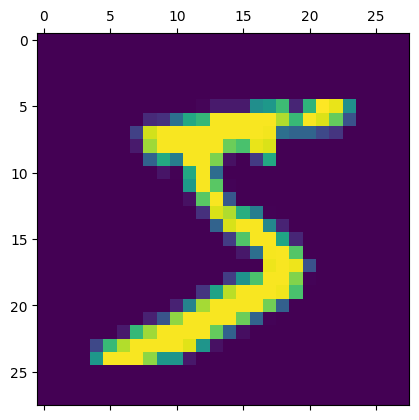

In [3]:
len(x_train)
len(x_test)
x_train[0].shape
plt.matshow(x_train[0])

## Data Preprocessing

Each 28x28 pixel image is flattened into a 1D array of 784 values (28 * 28). These values become the input features to the perceptron.

## Normalizing the dataset

In [ ]:
# Cast the records into float values
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [4]:
x_train = x_train/255
x_test = x_test/255

## Flatting the dataset in order

In [5]:
x_train_flatten = x_train.reshape(len(x_train), 28*28)
x_test_flatten = x_test.reshape(len(x_test), 28*28)

## Training

 During training, the perceptron learns the optimal weights that minimize the classification error. This typically involves presenting the training data to the perceptron iteratively (epoch by epoch) and adjusting the weights based on the errors made by the perceptron.

## Activation Function

The choice of activation function is important. Here I have Chosen Sigmoid Function.

The sigmoid activation function takes real values as input and converts them to numbers between 0 and 1 using the sigmoid formula.

In [6]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),
                       activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4715 - accuracy: 0.8756
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3041 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2833 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2737 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9255


# Model Evaluation

In [7]:
model.evaluate(x_test_flatten, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2679 - accuracy: 0.9254


[0.26785627007484436, 0.9254000186920166]

*  A loss of 0.2679 indicates that, on average, the model's predictions are off by about 0.2679 units from the actual targets.

* An accuracy of 0.9254 means that the model correctly classified approximately 92.54% of the test samples.

## Limitations


While perceptrons are simple and intuitive, they have limitations. They can only learn linear decision boundaries, which means they may struggle with tasks that require nonlinear separation of classes.

# Multi-layer Perceptron

Multi-layer perception is also known as MLP. It is fully connected dense layers, which transform any input dimension to the desired dimension. A multi-layer perception is a neural network that has multiple layers.

* A multi-layer perceptron has one input layer and for each input, there is one neuron(or node), it has one output layer with a single node for each output and it can have any number of hidden layers and each hidden layer can have any number of nodes.

### Import libraries

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

Download the dataset(MNIST dataset)

In [9]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [10]:
# Cast the records into float values
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

### Normalize

In [11]:
gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

In [12]:
print("Feature matrix:", x_train.shape)
print("Target matrix:", x_test.shape)
print("Feature matrix:", y_train.shape)
print("Target matrix:", y_test.shape)

Feature matrix: (60000, 28, 28)
Target matrix: (10000, 28, 28)
Feature matrix: (60000,)
Target matrix: (10000,)


### Model Training

* Hidden Layers: The presence of hidden layers in an MLP allows it to learn hierarchical representations of the input data, capturing increasingly abstract features at each layer.

In [13]:
model = Sequential([

    # reshape 28 row * 28 column data to 28*28 rows
    Flatten(input_shape=(28, 28)),

      # dense layer 1
    Dense(256, activation='sigmoid'),

    # dense layer 2
    Dense(128, activation='sigmoid'),

      # output layer
    Dense(10, activation='sigmoid'),
])

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
 model.fit(x_train, y_train, epochs=10,
          batch_size=2000,
          validation_split=0.2)

Epoch 1/10
24/24 [==============================] - 2s 56ms/step - loss: 2.0932 - accuracy: 0.3772 - val_loss: 1.7522 - val_accuracy: 0.6716
Epoch 2/10
24/24 [==============================] - 1s 46ms/step - loss: 1.4209 - accuracy: 0.7177 - val_loss: 1.0658 - val_accuracy: 0.7958
Epoch 3/10
24/24 [==============================] - 1s 47ms/step - loss: 0.8879 - accuracy: 0.8114 - val_loss: 0.6889 - val_accuracy: 0.8593
Epoch 4/10
24/24 [==============================] - 1s 46ms/step - loss: 0.6180 - accuracy: 0.8602 - val_loss: 0.5062 - val_accuracy: 0.8875
Epoch 5/10
24/24 [==============================] - 1s 46ms/step - loss: 0.4805 - accuracy: 0.8836 - val_loss: 0.4123 - val_accuracy: 0.9005
Epoch 6/10
24/24 [==============================] - 1s 47ms/step - loss: 0.4041 - accuracy: 0.8975 - val_loss: 0.3559 - val_accuracy: 0.9087
Epoch 7/10
24/24 [==============================] - 1s 46ms/step - loss: 0.3563 - accuracy: 0.9062 - val_loss: 0.3204 - val_accuracy: 0.9161
Epoch 8/10
24

In [16]:
results = model.evaluate(x_test,  y_test, verbose = 0)
print('test loss, test acc:', results)

test loss, test acc: [0.26581209897994995, 0.9244999885559082]


*  A loss of 0.2679 indicates that, on average, the model's predictions are off by about 0.2679 units from the actual targets.

* An accuracy of 0.9254 means that the model correctly classified approximately 92.54% of the test samples.

**Advantages of MLP for Digit Classification:**
* Non-linearity: MLPs can learn complex patterns and non-linear relationships in the data.
* Flexibility: The architecture of MLPs can be customized by adjusting the number of hidden layers, the number of neurons in each layer, and the choice of activation functions, allowing for flexibility in modeling different complexities of data.